ADALINE IMPLEMENTATION IN PYTHON

In [1]:
import numpy as np

In [2]:
class adaline:
    def __init__(self, eta=0.01, epochs=100, random_state=42):
        self.eta = eta #learning rate
        self.epochs = epochs #number of training iterations
        self.random_state = random_state #to stabalize the model

    def fit(self, X,y):
        
        rgen = np.random.RandomState(self.random_state) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)

            self.w_ += self.eta *2.0* X.T.dot(errors) /X.shape[0]
            self.b_ += self.eta *2.0* errors.mean()

            loss = (errors **2).mean()
            self.losses_.append(loss)

        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
       "Compute linear activation"""
       return X
    
    def predict(self, X):
         return np.where(self.activation(self.net_input(X))
                        >= 0.5, 1, 0)
        

In [35]:
#Training Dataset
X_train = np.array([
    [2.0, 3.0],
    [1.0, 5.0],
    [2.5, 1.0],
    [0.5, 0.5],
    [3.0, 2.0]
])

# Labels: 0 or 1
y_train = np.array([1, 1, 0, 0, 1])

In [4]:
ada = adaline(eta=0.01, epochs=100, random_state=1)
ada.fit(X_train, y_train)

In [5]:
# Test data (unseen points)
X_test = np.array([
    [2.2, 2.8],   # close to class 1
    [1.2, 4.8],   # close to class 1
    [2.8, 0.8],   # close to class 0
    [0.3, 0.7],   # close to class 0
    [3.2, 2.2]    # close to class 1
])

# Expected labels (for evaluation)
y_test = np.array([1, 1, 0, 0, 1])


In [6]:
# Predictions on test data
y_pred_test = ada.predict(X_test)

print("Predictions:", y_pred_test)
print("True labels:", y_test)

# Accuracy
acc = (y_pred_test == y_test).mean()
print(f"Test accuracy: {acc:.2f}")


Predictions: [1 1 0 0 1]
True labels: [1 1 0 0 1]
Test accuracy: 1.00


In [7]:
#USING STANDARDIZATION
X_train_std = np.copy(X_train)
X_train_std[:, 0] = (X_train[:,0] - X_train[:, 0].mean()) / X_train[:,0].std()
X_train_std[:,1] = (X_train[:,1] - X_train[:,1].mean()) / X_train[:,1].std()
X_test_std = np.copy(X_test)
X_test_std[:, 0] = (X_test[:,0] - X_test[:, 0].mean()) / X_test[:,0].std()
X_test_std[:,1] = (X_test[:,1] - X_test[:,1].mean()) / X_test[:,1].std()


In [8]:
ada.fit(X_train_std, y_train)

In [9]:
pred = ada.predict(X_test_std)
acc = (pred == y_test).mean()
print(f"Test accuracy: {acc:.2f}")

Test accuracy: 1.00


In [37]:
# ADAptive LInear NEuron (Adaline) with Stochastic Gradient Descent (SGD)

class AdalineSGD:

    def __init__(self, eta=0.01, epochs=100, shuffle=True, random_state=1):
        """
        Parameters:
        -----------
        eta : float
            Learning rate (controls how much weights are updated each step)
        epochs : int
            Number of passes (iterations) over the training dataset
        shuffle : bool
            Whether to shuffle training data every epoch (prevents cycles in learning)
        random_state : int
            Random seed for reproducibility of results
        """
        self.eta = eta
        self.epochs = epochs
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False   # To check if weights are initialized

    def fit(self, X, y):
        """
        Fit training data using stochastic gradient descent.
        
        Parameters:
        -----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values
        
        Returns:
        --------
        self : object
        """

        # Initialize weights with random small numbers
        self._initialize_weights(X.shape[1])

        self.losses_ = []  # Store average loss per epoch

        # Loop over training epochs
        for i in range(self.epochs):
            
            # Shuffle training data if enabled
            if self.shuffle:
                 X, y = self._shuffle(X, y)

            losses = []  # Track losses for each sample in this epoch
            
            # Loop through each training sample
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))  # Update weights for each sample

            # Compute average loss for the epoch
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)

        return self

    def partial_fit(self, X, y):
        """
        Update model without reinitializing weights.
        Useful for online learning with streaming data.
        """

        # Initialize weights if not done already
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])

        # If multiple samples, iterate through them
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:  # If only one sample
            self._update_weights(X, y)

        return self

    def _shuffle(self, X, y):
        """Shuffle training data to avoid cycles during learning"""
        r = self.rgen.permutation(len(y))  # Random permutation of indices
        return X[r], y[r]
    
    def activation(self, X):
        return X
    
    def _initialize_weights(self, m):
        """Initialize weights with small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)  # Random generator
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)  # Random weights
        self.b_ = np.float_(0.)  # Bias initialized to zero
        self.w_initialized = True
    
    def activation(self, X):
        return X
    
    def net_input(self, X):
        return np.dot(X,self.w_) + self.b_

    def _update_weights(self, xi, target):
        """
        Apply Adaline learning rule to update weights.

        Parameters:
        -----------
        xi : array-like, shape = [n_features]
            Training sample
        target : float
            True class label
        """

        # Compute model output
        output = self.activation(self.net_input(xi))
        
        # Calculate error (difference between true value and prediction)
        error = (target - output)

        # Update weights and bias using Adaline rule (gradient descent step)
        self.w_ += self.eta * xi * error
        self.b_ += self.eta * 2.0 * error

        # Compute squared error loss
        loss = error**2
        return loss
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

In [41]:
y_train_std = np.where(y_train == 0, -1, 1)
y_test_std = np.where(y_test == 0, -1, 1)

adasgd = AdalineSGD(eta=0.06, epochs=50, shuffle=True)
adasgd.fit(X_train_std, y_train_std)

In [42]:
from sklearn.metrics import accuracy_score

y_predi = adasgd.predict(X_test_std)
acc = accuracy_score(y_test_std, y_predi)

print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 100.00%


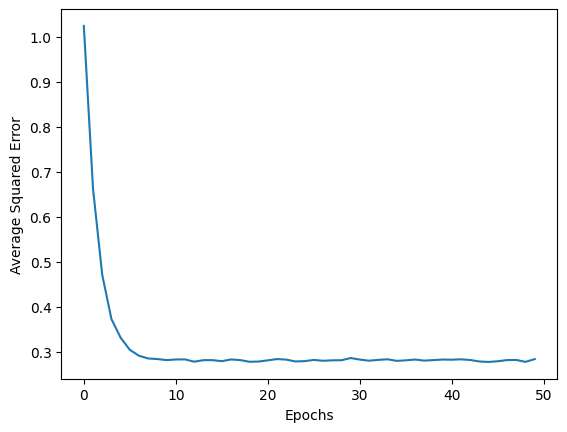

In [43]:
import matplotlib.pyplot as plt
plt.plot(adasgd.losses_)
plt.xlabel('Epochs')
plt.ylabel('Average Squared Error')
plt.show()